# Accessing Arome Data 
using ``meteofrance_publicapi``

In [ ]:
%pip install meteofrance_publicapi

## Get your application ID

See [the readme](https://github.com/antoinetavant/meteofranceapi?tab=readme-ov-file#usage) for details.

The following cell uses a dotfile.

In [ ]:
import dotenv
import os
dotenv.load_dotenv()
application_id = os.getenv("APPLICATION_ID")

## Optional : activate the logs inside the notebook

In [4]:
import logging

logging.basicConfig(level=logging.INFO)

In [5]:
from meteofrance_publicapi import AromeForecast

client = AromeForecast(application_id=application_id)
client.get_capabilities()

In [6]:
temperature_filename = client.get_coverage()

\tmp\cache\TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-04T06.00.00Z\temperature_2m_0Z.tiff
fetching data


c:\Users\antoi\.conda\envs\dev\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


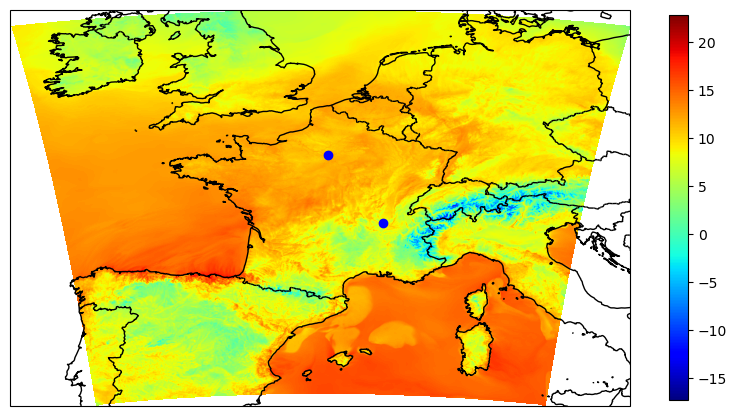

In [7]:
from meteofrance_publicapi.raster import plot_tiff_file

ax = plot_tiff_file(temperature_filename)